In [25]:
# imports
import kagglehub

import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image  # For image processing
from sklearn.model_selection import train_test_split # For splitting data
import tensorflow as tf # For image processing
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [26]:
# Dataset retrieval
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")
other_animals_path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)
print("Path to other animals:", other_animals_path)

Path to dataset files: /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1
Path to other animals: /root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5


Number of images: 12499
Unique widths: 416
Unique heights: 435


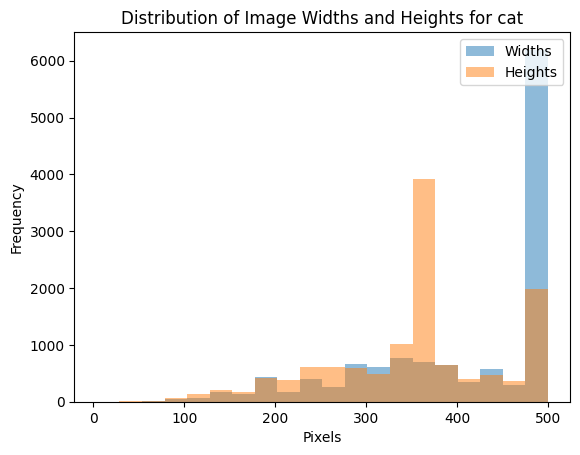

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Number of images: 12499
Unique widths: 425
Unique heights: 435


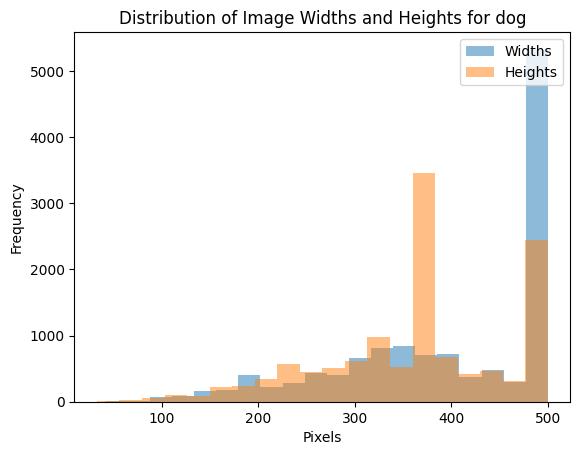

already removed


In [27]:
# check if images need to be resized.

data_dir_cat = '/root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat'  # Cat data directory
data_dir_dog = '/root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Dog'
data_dir_other = '/root/.cache/kagglehub/datasets/iamsouravbanerjee/animal-image-dataset-90-different-animals/versions/5/animals/animals'

def check_if_resizing_needed(data_dir, animal_type):
  image_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg')] # Get only jpg files

  widths = []
  heights = []

  for image_file in image_files:
      image_path = os.path.join(data_dir, image_file)
      try:
          img = Image.open(image_path)
          width, height = img.size
          widths.append(width)
          heights.append(height)
      except Exception as e: # Handle potential errors (e.g., corrupted files)
          print(f"Error opening image {image_file}: {e}")

  # Analyze the dimensions
  print(f"Number of images: {len(widths)}")
  print(f"Unique widths: {len(set(widths))}")
  print(f"Unique heights: {len(set(heights))}")

  plt.hist(widths, bins=20, alpha=0.5, label='Widths')
  plt.hist(heights, bins=20, alpha=0.5, label='Heights')
  plt.legend(loc='upper right')
  plt.title(f'Distribution of Image Widths and Heights for {animal_type}')
  plt.xlabel('Pixels')
  plt.ylabel('Frequency')
  plt.show()

check_if_resizing_needed(data_dir_cat, 'cat')
check_if_resizing_needed(data_dir_dog, 'dog')

# remove images with errors
try:
  os.remove("/root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat/666.jpg")
  os.remove("/root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Dog/11702.jpg")
except:
  print('already removed')

In [28]:
import cv2

image_dirs = [data_dir_cat, data_dir_dog]  # List of your image directories
processed_image_dir = 'processed_images/'
target_size = (128, 128)

if not os.path.exists(processed_image_dir):
    os.makedirs(processed_image_dir)


for filename in os.listdir(data_dir_cat):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')): # Add other extensions if needed
        image_path = os.path.join(data_dir_cat, filename)
        try:
            img = cv2.imread(image_path)

            if img is None:
                print(f"Error loading image {filename} from {data_dir_cat}. Skipping.")
                continue

            resized_img = cv2.resize(img, target_size)
            gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

            processed_filename = "processed_" + filename
            processed_image_path = os.path.join(processed_image_dir, 'CAT_' + processed_filename)
            cv2.imwrite(processed_image_path, gray_img)

        except Exception as e:
            print(f"Error processing image {filename} from {data_dir_cat}: {e}")

for filename in os.listdir(data_dir_dog):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')): # Add other extensions if needed
        image_path = os.path.join(data_dir_dog, filename)
        try:
            img = cv2.imread(image_path)

            if img is None:
                print(f"Error loading image {filename} from {data_dir_dog}. Skipping.")
                continue

            resized_img = cv2.resize(img, target_size)
            gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

            processed_filename = "processed_" + filename
            processed_image_path = os.path.join(processed_image_dir, 'DOG_' + processed_filename)
            cv2.imwrite(processed_image_path, gray_img)

        except Exception as e:
            print(f"Error processing image {filename} from {data_dir_dog}: {e}")

Error loading image 5553.jpg from /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat. Skipping.
Error loading image 8470.jpg from /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat. Skipping.
Error loading image 850.jpg from /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat. Skipping.
Error loading image 3300.jpg from /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat. Skipping.
Error loading image 660.jpg from /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat. Skipping.
Error loading image 9171.jpg from /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Cat. Skipping.
Error loading image 2663.jpg from /root/.cache/kagglehub/datasets/shaunthesheep/microsoft-catsvsdogs-dataset/versions/1/PetImages/Ca

In [29]:
for animal_name in os.listdir(data_dir_other):
    animal_dir = os.path.join(data_dir_other, animal_name)
    if os.path.isdir(animal_dir):  # Check if it's a directory
        for filename in os.listdir(animal_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_path = os.path.join(animal_dir, filename)
                try:
                    img = cv2.imread(image_path)

                    if img is None:
                        print(f"Error loading image {filename} from {animal_dir}. Skipping.")
                        continue

                    resized_img = cv2.resize(img, target_size)
                    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

                    processed_filename = f"processed_{filename}"
                    processed_image_path = os.path.join(processed_image_dir, animal_name + '_' + processed_filename)
                    cv2.imwrite(processed_image_path, gray_img)

                except Exception as e:
                    print(f"Error processing image {filename} from {animal_dir}: {e}")

print("Image processing complete.") # Indicate completion

Image processing complete.


In [30]:
# next, normalize and standardize images.

def normalize_and_standardize_image(image):
    """Normalizes and standardizes an image."""
    # Normalize to
    normalized_image = image.astype(np.float32) / 255.0

    # Standardize to mean 0 and std 1
    mean = np.mean(normalized_image)
    std = np.std(normalized_image)
    if std == 0: #prevent divide by zero.
      return normalized_image - mean
    standardized_image = (normalized_image - mean) / std

    return standardized_image

def process_images_into_npy_format(input_folder, output_folder):
    """
    Normalizes and standardizes images, saves as.npy
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if not image_files:
        print("No images found in the specified folder.")
        return

    for file in image_files:
        img_path = os.path.join(input_folder, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Error loading image: {file}")
            continue

        processed_img = normalize_and_standardize_image(img)

        # Save as.npy
        output_path = os.path.join(output_folder, file[:-4] + '.npy')  # Change extension
        np.save(output_path, processed_img)

input_folder = 'processed_images'
output_folder = 'npy_processed_images'
process_images_into_npy_format(input_folder, output_folder)


In [31]:
# zip the folder then download

import zipfile

def zip_folder(folder_path, output_zip_path):
  """Zips a folder into a zip file."""
  with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, _, files in os.walk(folder_path):
      for file in files:
        file_path = os.path.join(root, file)
        zipf.write(file_path, os.path.relpath(file_path, folder_path))

# Replace 'images_folder' with the actual name of your folder
folder_to_zip = 'npy_processed_images'
# Replace 'images.zip' with your desired zip file name
output_zip_file = 'npy_processed_images.zip'

zip_folder(folder_to_zip, output_zip_file)

print(f"Folder '{folder_to_zip}' zipped to '{output_zip_file}'")

import shutil

# Replace 'Colab_Outputs' with your desired folder name
destination_folder = '/content/drive/MyDrive/AAI530_Final_Project/processed'

# Create the folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

shutil.move(output_zip_file, os.path.join(destination_folder, output_zip_file))

print(f"images.zip moved to {destination_folder}")

# instructions to access:

# source_path = 'wherever npy_processed_images.zip is in your directory'
# destination_path = 'npy_processed_images.zip' #copies it to the current directory in colab

# shutil.copy(source_path, destination_path)

# print(f"npy_processed_images.zip copied from Drive to Colab")

# with zipfile.ZipFile('npy_processed_images.zip', 'r') as zip_ref:
#     zip_ref.extractall('extracted_images') #creates a folder named extracted images with the contents of the zip.

# print("npy_processed_images.zip extracted to 'extracted_images'")


Folder 'npy_processed_images' zipped to 'npy_processed_images.zip'
images.zip moved to /content/drive/MyDrive/AAI530_Final_Project/processed


CAT_processed_8547.npy


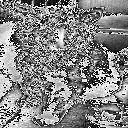

DOG_processed_11689.npy


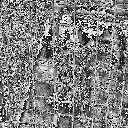

DOG_processed_8910.npy


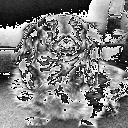

DOG_processed_3299.npy


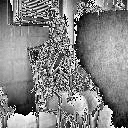

DOG_processed_3994.npy


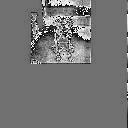

In [32]:
from google.colab.patches import cv2_imshow

# show new grayscale/resized images

def display_processed_images(image_folder, num_images=5):
    """Displays processed images (from.npy files)."""
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.npy')]
    num_images = min(num_images, len(image_files))
    sampled_files = np.random.choice(image_files, num_images, replace=False)

    for file in sampled_files:
        img_path = os.path.join(image_folder, file)
        img = np.load(img_path)  # Load.npy file

        # Convert to uint8 for display
        img_display = (img * 255).astype(np.uint8)

        print(file)
        cv2_imshow(img_display)

# Example usage:
image_folder = 'npy_processed_images'  # Use the new folder
display_processed_images(image_folder)

In [33]:
# edge density can be used as a feature for ML (optional)
def analyze_edges(image_folder, output_folder):
    """
    Performs edge detection and analysis,
    saves edge densities to a CSV file.
    """
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.npy')]
    edge_densities = {}

    for file in image_files:
        img_path = os.path.join(image_folder, file)
        img = np.load(img_path)

        # Convert to uint8 for edge detection
        img_uint8 = (img * 255).astype(np.uint8)

        # Apply Canny edge detection (adjust thresholds as needed)
        edges = cv2.Canny(img_uint8, 50, 150)

        # Calculate edge density
        edge_density = np.sum(edges > 0) / edges.size

        edge_densities[file] = edge_density

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save edge densities to a CSV file
    df = pd.DataFrame(list(edge_densities.items()), columns=['Filename', 'Edge Density'])
    df.to_csv(os.path.join(output_folder, 'edge_densities.csv'), index=False)


image_folder = 'npy_processed_images'
output_folder = 'edge_density_data'
densities = analyze_edges(image_folder, output_folder)

In [34]:
destination_folder = '/content/drive/MyDrive/AAI530_Final_Project/'

# Create the folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

shutil.move('edge_density_data/edge_densities.csv', os.path.join(destination_folder, 'edge_densities.csv'))

print(f"edge_densities.csv moved to {destination_folder}")

edge_densities.csv moved to /content/drive/MyDrive/AAI530_Final_Project/


In [35]:
# sample code to load edge density as a feature in model training

# 1. prepare image data and labels
# import os
# import numpy as np
# from sklearn.model_selection import train_test_split

# Load your image data (assuming.npy files)
# image_folder = 'further_processed_images'
# image_files = [f for f in os.listdir(image_folder) if f.endswith('.npy')]
# X =  # Image data
# y =  # Labels (replace with your actual labels)

# for file in image_files:
#     img_path = os.path.join(image_folder, file)
#     img = np.load(img_path)
#     X.append(img.flatten())  # Flatten the image

#     # Replace this with your actual label loading logic
#     # For example, if you have a CSV file with labels:
#     # label = df_labels[df_labels['Filename'] == file]['Label'].values
#     # y.append(label)

# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Add edge density as a feature
# Add edge density as a feature to the training and testing data
# X_train_with_edge = np.array([
#     np.append(x, edge_density_dict[file]) for x, file in zip(X_train, image_files)
# ])
# X_test_with_edge = np.array([
#     np.append(x, edge_density_dict[file]) for x, file in zip(X_test, image_files)
# ])
# 3. model training
# from sklearn.linear_model import LogisticRegression  # Example model

# # Create and train your model
# model = LogisticRegression()
# model.fit(X_train_with_edge, y_train)

# # Evaluate the model
# accuracy = model.score(X_test_with_edge, y_test)
# print(f"Accuracy: {accuracy}")

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# why PCA:
# Reduce the number of features: Represent your images with fewer dimensions while preserving important information.
# Visualize high-dimensional data: Project your image data onto a lower-dimensional space (e.g., 2D or 3D) to visualize patterns and clusters.
# Understand data structure: Identify the principal components that capture the most variance in your dataset, revealing the dominant patterns and features.

def apply_pca_and_save(image_folder, output_filename, n_components=50):
    """
    Applies PCA to image data and saves the principal components
    and explained variance ratio to a file.
    """
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.npy')]
    image_data = []

    for file in image_files:
        img_path = os.path.join(image_folder, file)
        img = np.load(img_path)
        image_data.append(img.flatten())

    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(image_data)

    # Save the principal components and explained variance ratio
    np.savez_compressed(
        output_filename,
        principal_components=principal_components,
        explained_variance=pca.explained_variance_ratio_
    )

# Example usage:
image_folder = 'npy_processed_images'
output_filename = 'pca_results.npz'
apply_pca_and_save(image_folder, output_filename)

In [37]:
destination_folder = '/content/drive/MyDrive/AAI530_Final_Project/'

# Create the folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

shutil.move('pca_results.npz', os.path.join(destination_folder, 'pca_results.npz'))

print(f"pca_results.npz moved to {destination_folder}")

pca_results.npz moved to /content/drive/MyDrive/AAI530_Final_Project/


In [38]:
# pca usage
# import numpy as np

# # Load PCA results
# pca_results = np.load('pca_results.npz')
# principal_components = pca_results['principal_components']
# explained_variance = pca_results['explained_variance']
